In [2]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import matplotlib.pyplot as plt
from time import time
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [11]:
data=pd.read_csv('Shipping.csv')    ### 如果不是Jupyter，同样把数据（Shipping.csv）与py文件放置统一文件夹下，在改文件夹中运行py
data

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


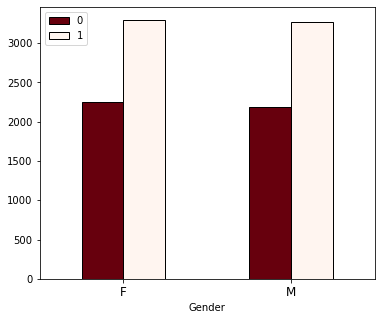

In [12]:
pd.crosstab(data.Gender, data['Reached.on.Time_Y.N']).plot.bar(stacked=False,figsize=(6,5),colormap='Reds_r',edgecolor='k')
plt.xticks(rotation=0,size='large')
plt.legend()

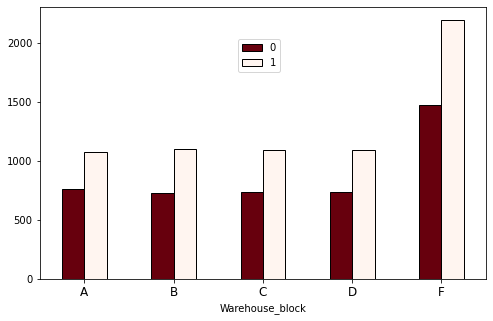

In [13]:
pd.crosstab(data['Warehouse_block'], data['Reached.on.Time_Y.N']).plot.bar(stacked=False,figsize=(8,5),colormap='Reds_r',edgecolor='k')
plt.xticks(rotation=0,size='large')
plt.legend(bbox_to_anchor=(0.55,0.9))

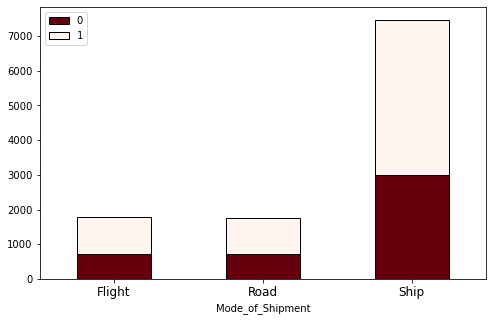

In [14]:
pd.crosstab(data['Mode_of_Shipment'], data['Reached.on.Time_Y.N']).plot.bar(stacked=True,figsize=(8,5),colormap='Reds_r',edgecolor='k')
plt.xticks(rotation=0,size='large')
plt.legend()

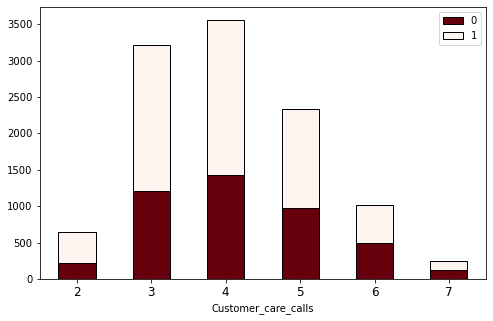

In [15]:
pd.crosstab(data['Customer_care_calls'], data['Reached.on.Time_Y.N']).plot.bar(stacked=True,figsize=(8,5),colormap='Reds_r',edgecolor='k')
plt.xticks(rotation=0,size='large')
plt.legend()

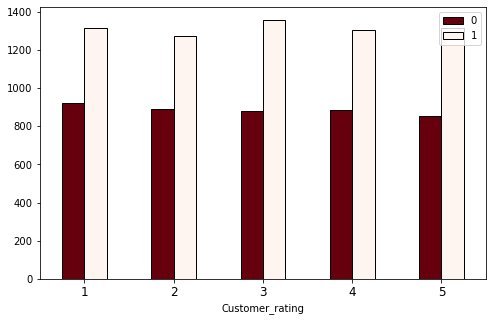

In [16]:
pd.crosstab(data['Customer_rating'], data['Reached.on.Time_Y.N']).plot.bar(stacked=False,figsize=(8,5),colormap='Reds_r',edgecolor='k')
plt.xticks(rotation=0,size='large')
plt.legend()

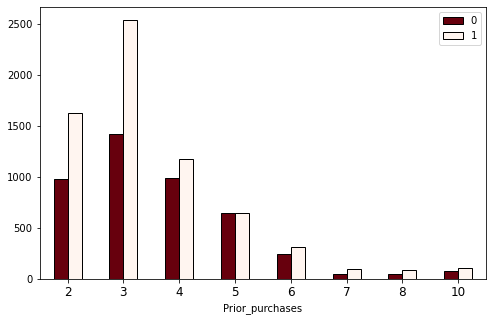

In [17]:
pd.crosstab(data['Prior_purchases'], data['Reached.on.Time_Y.N']).plot.bar(stacked=False,figsize=(8,5),colormap='Reds_r',edgecolor='k')
plt.xticks(rotation=0,size='large')
plt.legend()

In [18]:
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['Cost_of_the_Product', 'Discount_offered', 'Weight_in_gms']
features_log_minmax_transform=data
features_log_minmax_transform[numerical] = scaler.fit_transform(data[numerical])
features_log_minmax_transform

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,0.378505,3,low,F,0.671875,0.033893,1
1,2,F,Flight,4,5,0.560748,2,low,M,0.906250,0.304894,1
2,3,A,Flight,2,2,0.406542,4,low,M,0.734375,0.346676,1
3,4,B,Flight,3,3,0.373832,4,medium,M,0.140625,0.025712,1
4,5,C,Flight,2,2,0.411215,3,medium,F,0.703125,0.216654,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,0.728972,5,medium,F,0.000000,0.078451,1
10995,10996,B,Ship,4,1,0.635514,5,medium,F,0.078125,0.035939,0
10996,10997,C,Ship,5,4,0.682243,5,low,F,0.046875,0.022498,0
10997,10998,F,Ship,5,2,0.593458,6,medium,M,0.015625,0.030533,0


In [19]:
features_final = pd.get_dummies(features_log_minmax_transform.drop(['Reached.on.Time_Y.N'],axis=1))
features_final

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
0,1,4,2,0.378505,3,0.671875,0.033893,0,0,0,1,0,1,0,0,0,1,0,1,0
1,2,4,5,0.560748,2,0.906250,0.304894,0,0,0,0,1,1,0,0,0,1,0,0,1
2,3,2,2,0.406542,4,0.734375,0.346676,1,0,0,0,0,1,0,0,0,1,0,0,1
3,4,3,3,0.373832,4,0.140625,0.025712,0,1,0,0,0,1,0,0,0,0,1,0,1
4,5,2,2,0.411215,3,0.703125,0.216654,0,0,1,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,4,1,0.728972,5,0.000000,0.078451,1,0,0,0,0,0,0,1,0,0,1,1,0
10995,10996,4,1,0.635514,5,0.078125,0.035939,0,1,0,0,0,0,0,1,0,0,1,1,0
10996,10997,5,4,0.682243,5,0.046875,0.022498,0,0,1,0,0,0,0,1,0,1,0,1,0
10997,10998,5,2,0.593458,6,0.015625,0.030533,0,0,0,0,1,0,0,1,0,0,1,0,1


In [20]:
label =features_log_minmax_transform['Reached.on.Time_Y.N']
label

0        1
1        1
2        1
3        1
4        1
        ..
10994    1
10995    0
10996    0
10997    0
10998    0
Name: Reached.on.Time_Y.N, Length: 10999, dtype: int64

In [21]:
#八二区分训练集与测试集
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    label, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

print("训练集有 {} 个样本.".format(X_train.shape[0]))
print("测试集有 {} 个样本.".format(X_test.shape[0]))

训练集有 8799 个样本.
测试集有 2200 个样本.


In [27]:
#训练模型，得到相应的参数，然后得到预测结果，计算相应的分数
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    
    results = {}
    
    
    start = time() # 
    learner = learner.fit(X_train[:sample_size],y_train[:sample_size])
    end = time() 
    results['train_time'] = end-start
    
    start = time() 
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() 
    
    results['pred_time'] = end-start
            
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train)
        
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    results['f_train'] = fbeta_score(y_train[:300],predictions_train,0.5)
        
    results['f_test'] = fbeta_score(y_test,predictions_test,0.5)
       
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
    return results
#可视化训练结果
def evaluate(results, accuracy, f1):
    
    fig, ax = plt.subplots(2, 4, figsize = (15,12))

    bar_width = 0.3
    colors = ['#A00000','#00A0A0','#00A000']
    
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
            for i in np.arange(3):
                
                
                ax[j//3, j%3].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j//3, j%3].set_xticks([0.45, 1.45, 2.45])
                ax[j//3, j%3].set_xticklabels(["1%", "10%", "100%"])
                ax[j//3, j%3].set_xlabel("Training Set Size")
                ax[j//3, j%3].set_xlim((-0.1, 3.0))
    
    ax[0, 0].set_ylabel("时间（s）")
    ax[0, 1].set_ylabel("准确率")
    ax[0, 2].set_ylabel("F分数")
    ax[1, 0].set_ylabel("时间（s）")
    ax[1, 1].set_ylabel("准确率")
    ax[1, 2].set_ylabel("F分数")
    
    ax[0, 0].set_title("训练时间")
    ax[0, 1].set_title("训练集准确率")
    ax[0, 2].set_title("训练集F分数")
    ax[1, 0].set_title("测试集运行时间")
    ax[1, 1].set_title("测试集准确率")
    ax[1, 2].set_title("测试集F分数")
    
    
    
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))

    ax[0, 3].set_visible(False)
    ax[1, 3].axis('off')

    for i, learner in enumerate(results.keys()):
        plt.bar(0, 0, color=colors[i], label=learner)
    plt.legend()
    
    plt.suptitle("机器学习模型的学习表现", fontsize = 16, y = 1.10)
    plt.tight_layout()
    plt.show()

In [34]:
X_train[0:round(len(X_train)/100)]

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
628,629,6,1,0.037383,4,0.343750,0.064427,0,0,1,0,0,0,0,1,0,0,1,1,0
6297,6298,6,1,0.920561,5,0.093750,0.007451,0,1,0,0,0,1,0,0,0,0,1,1,0
9252,9253,3,4,0.752336,4,0.109375,0.552082,0,0,0,1,0,0,0,1,0,0,1,1,0
5365,5366,3,4,0.546729,3,0.046875,0.729730,0,0,0,0,1,0,0,1,1,0,0,1,0
10529,10530,3,2,0.649533,2,0.125000,0.601169,0,0,0,0,1,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6881,6882,5,2,0.775701,6,0.046875,0.077575,0,0,0,0,1,0,0,1,0,0,1,1,0
6777,6778,5,1,0.714953,3,0.062500,0.495398,0,1,0,0,0,0,0,1,0,0,1,1,0
6978,6979,4,2,0.808411,2,0.015625,0.440029,0,0,0,1,0,0,1,0,0,0,1,1,0
10287,10288,3,3,0.556075,2,0.015625,0.680789,0,1,0,0,0,1,0,0,0,1,0,1,0


In [ ]:
#选取模型，选取了支持向量机，随机森林，SGD

clf_A = SVC(kernel='linear')
clf_B = RandomForestClassifier(random_state=1)
clf_C = SGDClassifier(random_state=1)

#分别计算1%，10%与全部数据集的结果
samples_100 = len(X_train)

samples_10 = round(len(X_train)/10)

samples_1= round(len(X_train)/100)

results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        y_train_c=np.array(y_train).reshape((len(y_train)))
        y_test_c=np.array(y_test).reshape((len(y_test)))
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train_c, X_test, y_test_c)

In [ ]:
pd.DataFrame(results['SVC'])

In [ ]:
pd.DataFrame(results['RandomForestClassifier'])

In [ ]:
pd.DataFrame(results['SGDClassifier'])

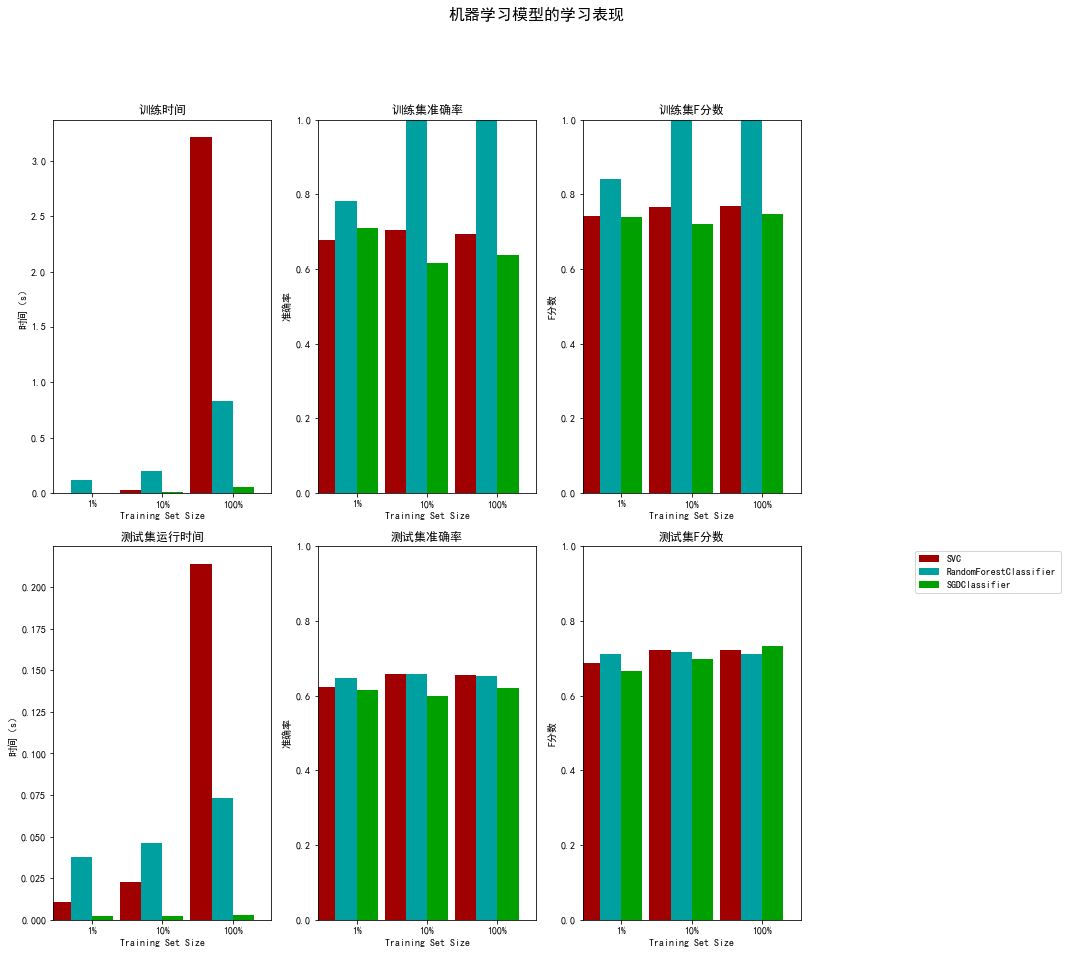

In [71]:
evaluate(results, accuracy_score, fbeta_score)